In [ ]:
import torch
import torchvision
from PIL import Image
from torchsummary import summary

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
num_classes = 43

class CNN(torch.nn.Module):
  def __init__(self, num_classes = num_classes):
    super(CNN, self).__init__()
    self.conv1 = torch.nn.Conv2d(3, 8, kernel_size = 5, stride = 1, padding = 2)
    self.batch1 = torch.nn.BatchNorm2d(8)
    self.relu1 = torch.nn.ReLU()
    self.drop1 = torch.nn.Dropout2d(p = 0.2)
    self.pool1 = torch.nn.MaxPool2d(kernel_size = 2)

    self.conv2 = torch.nn.Conv2d(8, 16, kernel_size = 5, stride = 1, padding = 2)
    self.batch2 = torch.nn.BatchNorm2d(16)
    self.relu2 = torch.nn.ReLU()
    self.drop2 = torch.nn.Dropout2d(p = 0.2)
    self.pool2 = torch.nn.MaxPool2d(kernel_size = 2)

    self.Flatten = torch.nn.Flatten()

    self.fc = torch.nn.Linear(16 * 64 * 64, out_features = num_classes)

  def forward(self, x):
    out = self.conv1(x)
    out = self.batch1(out)
    out = self.relu1(out)
    out = self.drop1(out)
    out = self.pool1(out)

    out = self.conv2(out)
    out = self.batch2(out)
    out = self.relu2(out)
    out = self.drop2(out)
    out = self.pool2(out)

    out = self.Flatten(out)

    out = self.fc(out)

    return torch.nn.functional.log_softmax(out, dim = 1)


model = CNN(num_classes).to(device)

print(summary(model, (3,256,256)))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 8, 256, 256]             608
       BatchNorm2d-2          [-1, 8, 256, 256]              16
              ReLU-3          [-1, 8, 256, 256]               0
         Dropout2d-4          [-1, 8, 256, 256]               0
         MaxPool2d-5          [-1, 8, 128, 128]               0
            Conv2d-6         [-1, 16, 128, 128]           3,216
       BatchNorm2d-7         [-1, 16, 128, 128]              32
              ReLU-8         [-1, 16, 128, 128]               0
         Dropout2d-9         [-1, 16, 128, 128]               0
        MaxPool2d-10           [-1, 16, 64, 64]               0
          Flatten-11                [-1, 65536]               0
           Linear-12                   [-1, 43]       2,818,091
Total params: 2,821,963
Trainable params: 2,821,963
Non-trainable params: 0
---------------------------

<ipython-input-20-5e9a2e63479c>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/gtrsb_cnn2.pt'))


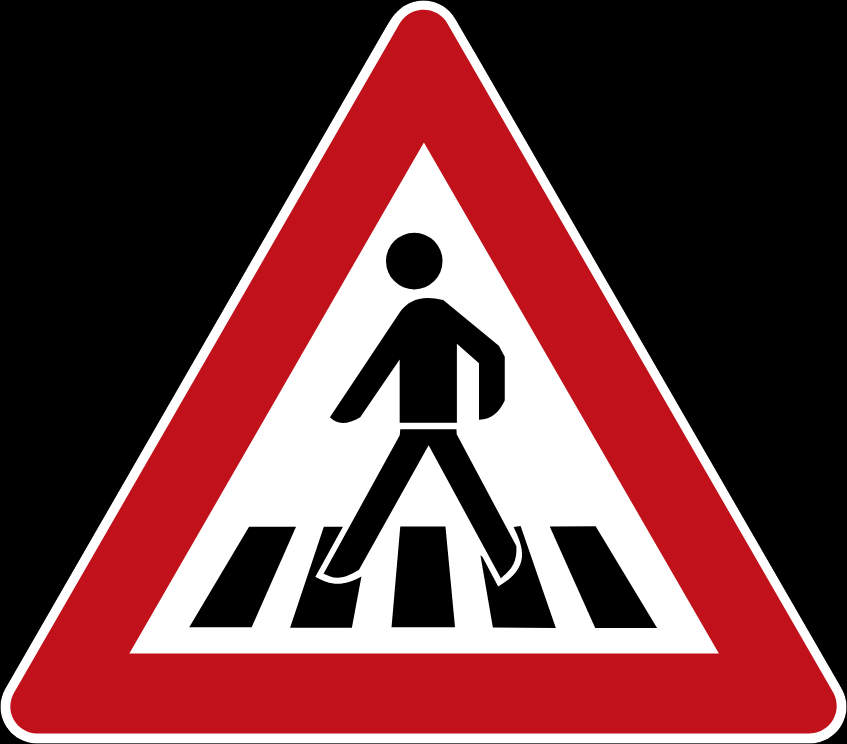

(847, 744)

torch.Size([1, 3, 256, 256])
tensor([27])
27


In [ ]:
model.load_state_dict(torch.load('/content/gtrsb_cnn2.pt'))

model.eval()

# To visualize the image
img = Image.open('/content/sign.jpg').convert('RGB')
display(img)
display(img.size)

# ResNet only accept the image size of (256,256)
transforms = [torchvision.transforms.Resize((256,256)), # to resize
              torchvision.transforms.ToTensor()] # convert to tensor
              #torchvision.transforms.Normalize(mean = (0.5,0.5,0.5), std = (0.5,0.5,0.5))] # normalize

transformations = torchvision.transforms.Compose(transforms) # Compose means - putting everything from list above together and pass it to object

transformed = transformations(img) # accept img into the compose # transformed image

transformed = transformed.unsqueeze(0)

print(transformed.size())

predicted_output = model(transformed) # pass transformed image into model

_, predicted = torch.max(predicted_output, 1)
print(predicted) # predicted is in tensor

# convert tensor into numpy
predicted = predicted.cpu().data.numpy()[0]
print(predicted)